In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Import packages
import pandas as pd
import numpy as np


In [13]:
# Import and display the first dataset
appendLeft = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Ch5-Data-Wrangling/Data/appending data.left.csv")
appendLeft


,Country,Continent,GDP,EducationYears
0,Bangladesh,Asia,"350,000,000,000",4.7
1,China,Asia,"13,180,000,000,000",8.5
2,India,Asia,"2,720,000,000,000",5.7
3,Norway,Europe,"362,000,000,000",14.2
4,United States,North America,"20,650,000,000,000",13.5


In [14]:
# Import and display the second dataset
appendRight = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Ch5-Data-Wrangling/Data/appending data.right.csv")
appendRight

,Country,Continent,Population
0,Bangladesh,Asia,"129,155,000"
1,Brazil,South America,"170,115,000"
2,China,Asia,"1,277,558,000"
3,India,Asia,"1,013,662,000"
4,United States,North America,"278,357,000"


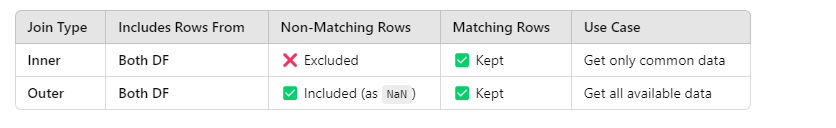

Summary of inner and outer join in panda merge()



In [15]:
# Join the first and second datasets.
# Sort the result along join columns.
appendLeft.merge(appendRight, how='outer', sort=True)



,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,Brazil,South America,NaN,NaN,"170,115,000"
2,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
3,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
4,Norway,Europe,"362,000,000,000",14.2,NaN
5,United States,North America,"20,650,000,000,000",13.5,"278,357,000"


Do We Need a Key Column for an Outer Merge?

Yes, when performing an outer merge, a key column (or multiple key columns) is required to determine how the rows from both DataFrames should align. Without a key, the merge will be ambiguous.

What is a Key Column?
A key column is a column that exists in both DataFrames and is used to match rows. In your case, Country and Continent serve as the key columns.



**merged_df = appendLeft.merge(appendRight, on=["Country", "Continent"], how="outer", sort=True)**

on=["Country", "Continent"] ensures that rows are matched correctly.
how="outer" includes all rows from both DataFrames.

In [6]:
merged_df = appendLeft.merge(appendRight, on=["Country", "Continent"], how="outer", sort=True)
merged_df

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,Brazil,South America,NaN,NaN,"170,115,000"
2,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
3,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
4,Norway,Europe,"362,000,000,000",14.2,NaN
5,United States,North America,"20,650,000,000,000",13.5,"278,357,000"


In [9]:
#inner joing --> not shown in the Trylab. I added the following line:

inner_join_df = appendLeft.merge(appendRight, on=["Country", "Continent"], how="inner")
inner_join_df

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
2,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
3,United States,North America,"20,650,000,000,000",13.5,"278,357,000"


In [ ]:
# Concatenating rows
pd.concat([appendLeft, appendRight], axis=0) #row-wise operation


,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,NaN
1,China,Asia,"13,180,000,000,000",8.5,NaN
2,India,Asia,"2,720,000,000,000",5.7,NaN
3,Norway,Europe,"362,000,000,000",14.2,NaN
4,United States,North America,"20,650,000,000,000",13.5,NaN
0,Bangladesh,Asia,NaN,NaN,"129,155,000"
1,Brazil,South America,NaN,NaN,"170,115,000"
2,China,Asia,NaN,NaN,"1,277,558,000"
3,India,Asia,NaN,NaN,"1,013,662,000"
4,United States,North America,NaN,NaN,"278,357,000"


In [10]:
# Use apply to calculate the sum of EducationYears
appendLeft[['EducationYears']].apply(np.sum)

,0
EducationYears,46.6


In [ ]:
# Insert a new column
z = appendLeft['EducationYears']>10

appendLeft.insert(loc=4, column='MoreThan10Years', value=z)
appendLeft

,Country,Continent,GDP,EducationYears,MoreThan10Years
0,Bangladesh,Asia,"350,000,000,000",4.7,False
1,China,Asia,"13,180,000,000,000",8.5,False
2,India,Asia,"2,720,000,000,000",5.7,False
3,Norway,Europe,"362,000,000,000",14.2,True
4,United States,North America,"20,650,000,000,000",13.5,True
